In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In questa esercitazione, compareremo alcune metriche per la valutazione delle performance di un algoritmo di regressione.

Partiamo generando i dati alla stessa maniera che abbiamo visto nel corso della lezione.

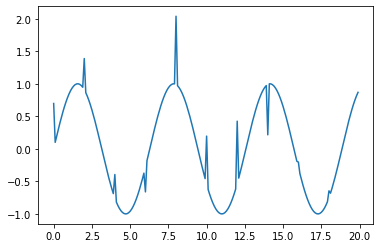

In [2]:
X = np.arange(0, 20, .1).reshape(-1, 1)
y = np.sin(X)
y[::20] += np.random.normal(0, 1, y.shape)[::20]
y = y.ravel()

plt.plot(X, y)
plt.show()

Creiamo adesso un regressore con un albero decisionale. Usiamo come parametro per `max_depth` il valore 2.

In [3]:
rgr = DecisionTreeRegressor(max_depth=2)
rgr.fit(X, y)
y_pred = rgr.predict(X)

Calcoliamo ora tre metriche per valutare le performance dell'algoritmo.

Useremo il *Mean Squared Error* (**MSE**), ovvero l'errore quadratico medio, dato dal quadrato della differenza media tra i valore predetti dal regressore $\hat{y}$ ed il valore vero $y$, il *Mean Absolute Error* (**MAE**), nel quale si tiene conto della differenza in termini di valori assoluti tra $\hat{y}$ ed $y$, ed il *coefficiente di determinazione* $R^2$, usato per spiegare quanto le variabili indipendenti nel modello di regressione descrivano la variabilità delle variabili dipendenti.

In particolare, il valore dell'*MSE* penalizza gli errori di predizione maggiori rispetto a quello dell'*MAE*. Tuttavia, è più complesso determinare quali campioni contribuiscano maggiormente all'errore, in quanto vi è una relazione quadratica (e quindi non lineare). Per mitigare questo effetto, si può usare la radice quadrata dell'*MSE*, chiamata *Root Mean Squared Error* (**RMSE**). Tuttavia, si può tranquillamente affermare che *valori inferiori di MSE e MAE indicano modelli con migliori capacità predittive*.

Per quello che riguarda il valore del coefficiente di determinazione, questo tende a diminuire quando nel problema ci sono delle variabili indipendenti tra loro ridondanti, da cui la necessità di utilizzare tecniche di riduzione della dimensionalità o, ancora meglio, feature seleciton. A differenza dell'*MSE* e del *MAE*, valori superiori di $R^2$ indicano una maggiore qualità del modello.

In generale, tuttavia, il modo migliore per comparare modelli differenti risulta essere utilizzare l'*MSE*.

In [4]:
print('MAE: {}\nMSE: {}\nR2: {}'.format(
    round(mean_absolute_error(y, y_pred), 2),
    round(mean_squared_error(y, y_pred), 2),
    round(r2_score(y, y_pred), 2)
))

MAE: 0.5
MSE: 0.37
R2: 0.27


Vediamo cosa accade usando un regressore con `max_depth=3`.

In [5]:
rgr = DecisionTreeRegressor(max_depth=3)
rgr.fit(X, y)
y_pred = rgr.predict(X)
print('MAE: {}\nMSE: {}\nR2: {}'.format(
    round(mean_absolute_error(y, y_pred), 2),
    round(mean_squared_error(y, y_pred), 2),
    round(r2_score(y, y_pred), 2)
))

MAE: 0.41
MSE: 0.28
R2: 0.45


Come prevedibile, i valori legati agli errori diminuiscono, in quanto il regressore con `max_depth=3` risulta avere performance migliori di quello in cui `max_depth` è pari a 2. Inoltre, vediamo contestualmente un aumento del valore di $R^2$, il che ci permette di affermare che, grazie a questa regressione, le variabili dipendenti sono "descritte meglio" rispetto al caso precedente.

In [17]:
import pandas as pd
df = pd.read_csv('../dataset/train.csv')
df.dropna(axis=0, inplace=True)
from sklearn.preprocessing import OrdinalEncoder

In [18]:
s = df['Sex'].to_numpy().reshape(-1, 1)
enc = OrdinalEncoder()
s_tr = enc.fit_transform(s)

In [19]:
import numpy as np
a = df['Age'].to_numpy().reshape(-1, 1)
y = df['Fare'].to_numpy().reshape(-1, 1)
X = np.append(s_tr, a, axis=1)

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()


# y_pred = dt.predict(X)

from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(dt, X, y, cv=10))

-1.2215453536990646

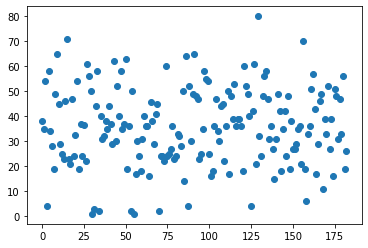

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(np.arange(X.shape[0]), X[:, 1])
plt.show()

In [33]:
dt.fit(X, y)

DecisionTreeRegressor()

In [38]:
# quanto dovrebbe pagare un uomo di 50 anni?
dt.predict(np.array([[0, 50]]))

array([138.11665])

In [39]:
# quanto dovrebbe pagare una donna di 20 anni?
dt.predict(np.array([[1, 20]]))

array([107.91666667])